Find projective transformation matrix with 4 point pairs by solving equation with 13 unknowns (H, w_1, w_2, w_3, w_4)

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/images/cvbook.jpg


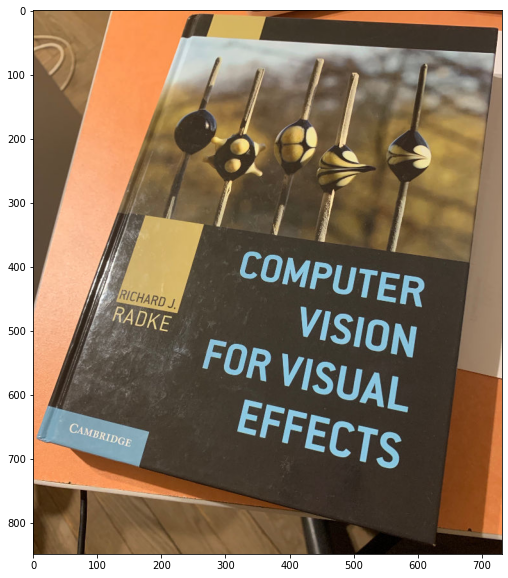

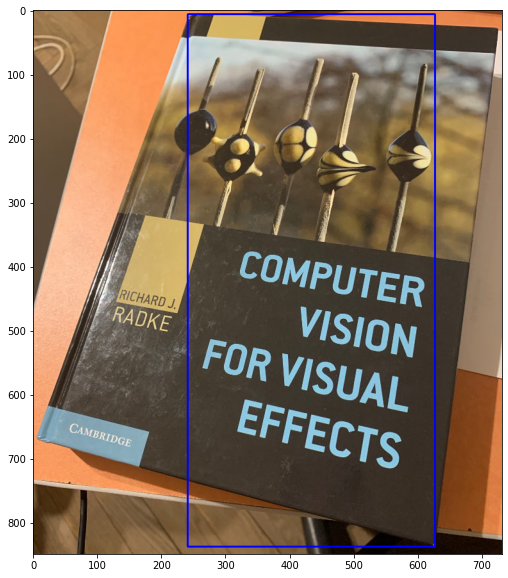

[[-4.42294919e-03 -1.57008015e-03  1.07535124e+00]
 [ 2.34342778e-04 -4.94157598e-03 -2.68271537e-02]
 [-1.78399611e-06 -3.64578167e-06 -5.86989849e-03]]


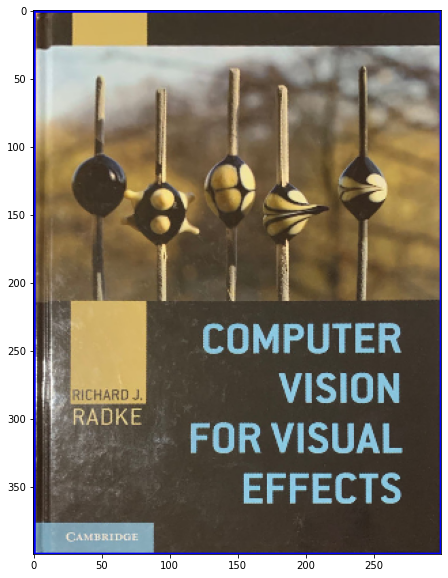

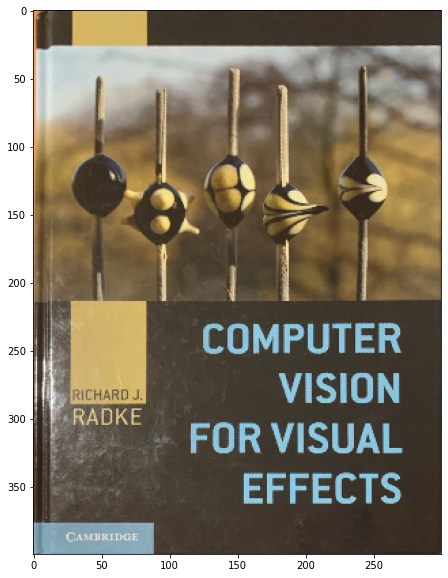

In [42]:
import numpy as np
import cv2
from skimage import io
from matplotlib import pyplot as plt

def imshow(np_img, size=(10, 10), is_gray=False):
    plt.figure(figsize=size)
    if is_gray:
        plt.imshow(np_img, cmap='gray', vmin=0, vmax=255)
    else:
        plt.imshow(cv2.cvtColor(np_img, cv2.COLOR_BGR2RGB))
    plt.show()

def url_to_image(url):
    print("downloading %s" % (url))
    return cv2.cvtColor(io.imread(url), cv2.COLOR_BGR2RGB)

def get_M(pts1, pts2):
    A = np.array([
        [pts1[0][0], pts1[0][1], 1, 0, 0, 0, 0, 0, 0, -pts2[0][0], 0, 0, 0],
        [0, 0, 0, pts1[0][0], pts1[0][1], 1, 0, 0, 0, -pts2[0][1], 0, 0, 0],
        [0, 0, 0, 0, 0, 0, pts1[0][0], pts1[0][1], 1, -1, 0, 0, 0],
        [pts1[1][0], pts1[1][1], 1, 0, 0, 0, 0, 0, 0, 0, -pts2[1][0], 0, 0],
        [0, 0, 0, pts1[1][0], pts1[1][1], 1, 0, 0, 0, 0, -pts2[1][1], 0, 0],
        [0, 0, 0, 0, 0, 0, pts1[1][0], pts1[1][1], 1, 0, -1, 0, 0],
        [pts1[2][0], pts1[2][1], 1, 0, 0, 0, 0, 0, 0, 0, 0, -pts2[2][0], 0],
        [0, 0, 0, pts1[2][0], pts1[2][1], 1, 0, 0, 0, 0, 0, -pts2[2][1], 0],
        [0, 0, 0, 0, 0, 0, pts1[2][0], pts1[2][1], 1, 0, 0, -1, 0],
        [pts1[3][0], pts1[3][1], 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, -pts2[3][0]],
        [0, 0, 0, pts1[3][0], pts1[3][1], 1, 0, 0, 0, 0, 0, 0, -pts2[3][1]],
        [0, 0, 0, 0, 0, 0, pts1[3][0], pts1[3][1], 1, 0, 0, 0, -1],
        np.ones(13),
    ])
    b = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])
    x = np.dot(np.linalg.inv(A), b)[:9].reshape((3, 3))
    return x

url = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/images/cvbook.jpg"
img = url_to_image(url)
imshow(img)
(r,c) = img.shape[:2]

pts1 = np.float32([[241,6],[726,29],[6,668],[627,837]])
pts2 = np.float32([[0,0],[300,0],[0,400],[300,400]])

img_copy = img.copy()
cv2.rectangle(img_copy, pts1[0].astype(np.int32), pts1[3].astype(np.int32), (255,0,0), 2)
imshow(img_copy)

# implement this function
# M = cv2.getPerspectiveTransform(pts1,pts2)
M = get_M(pts1,pts2)
print(M)

dst = cv2.warpPerspective(img,M,(300, 400))

img_copy = dst.copy()
cv2.rectangle(img_copy, pts2[0].astype(np.int32), pts2[3].astype(np.int32), (255,0,0), 2)
imshow(img_copy)

imshow(dst)

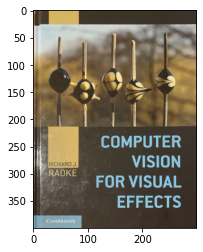

In [32]:


plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

In [ ]:
get_M()